### Load in and examine the data

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import re

In [4]:
df = pd.read_csv('train.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### Handle missing data

In [5]:
# Check for null values

print("Checking for null values:")
df.isnull().sum()

Checking for null values:


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# Replace any nulls values

df = df.fillna(' ')
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

### Remove stop words

In [7]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_text'] = df['text'].apply(remove_stopwords)
df.head(10)

,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide : ’ Even See Comey ’ Letter Jas...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,Ever get feeling life circles roundabout rathe...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"Truth Might Get Fired October 29 , 2016 tensio..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Videos 15 Civilians Killed Single US Airstrike...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Print Iranian woman sentenced six years prison...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,"trying times , Jackie Mason Voice Reason . [ w..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Ever wonder Britain ’ iconic pop pianist gets ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,"PARIS — France chose idealistic , traditional ..."
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Donald J. Trump scheduled make highly anticipa...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,week Michael T. Flynn resigned national securi...


### Split the data into test/train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size = 0.2)

### Vectorize the data using TF-IDF

In [9]:
vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Create the model

In [10]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9567307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2041
           1       0.95      0.96      0.96      2119

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



We can see that our model has excellent precision and recall for both True and False statements, and has an accuracy of ~95%.
Let's run the model multiple times to get a better idea of how consistent those results are.

### Model simulations

*Note: The following code block may take >15 minutes to run.

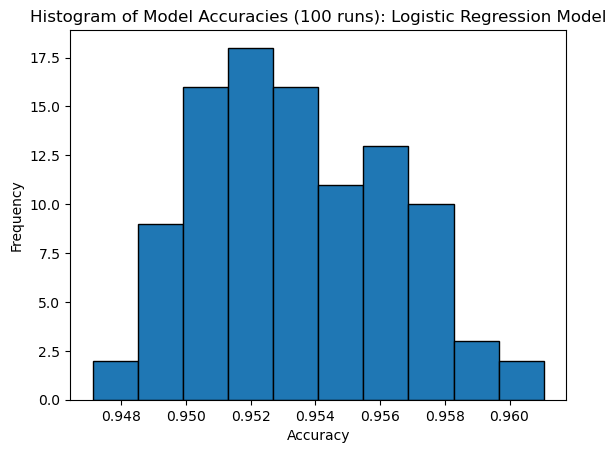

In [ ]:
log_accuracies = []

for _ in range(100):  # Run 100 times
    
    X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size = 0.2)
    
    vectorizer = TfidfVectorizer(max_features = 5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    log_accuracies.append(accuracy)

plt.hist(log_accuracies, bins = 10, edgecolor = 'black')
plt.title('Histogram of Model Accuracies (100 runs): Logistic Regression Model')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Determine the confidence interval

log_mean = np.mean(log_accuracies)
log_std = np.std(log_accuracies, ddof = 1)
log_n = len(log_accuracies)

confidence_level = 0.95

z_score = 1.96  # for a 95% confidence level

log_moe = z_score * (log_std / np.sqrt(log_n))

log_confidence_interval = (log_mean - log_moe, log_mean + log_moe)

print(f"95% Confidence Interval: ({log_confidence_interval[0]:.3f}, {log_confidence_interval[1]:.3f})")


95% Confidence Interval: (0.953, 0.954)


The sample distribution of our model accuracies is relatively normal and centered around 95.3%.  This indicates the model is stable and performs consistently well.

This bodes well for our logistic regression model.  But how would other models perform?  Let's try using an stochastic gradient descent model.

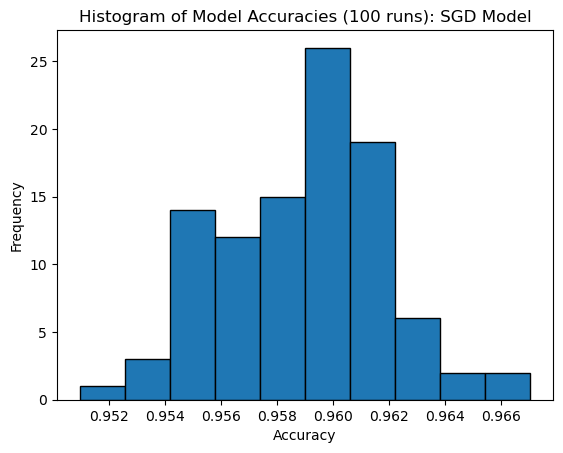

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_accuracies = []

for _ in range(100):  # Run 100 times
    X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size = 0.2)
    
    vectorizer = TfidfVectorizer(max_features = 5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    model = SGDClassifier(max_iter = 1000, tol = 1e-3)
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    sgd_accuracies.append(accuracy)

plt.hist(sgd_accuracies, bins = 10, edgecolor = 'black')
plt.title('Histogram of Model Accuracies (100 runs): SGD Model')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [14]:
sgd_mean = np.mean(sgd_accuracies)
sgd_std = np.std(sgd_accuracies, ddof = 1)
sgd_n = len(sgd_accuracies)

confidence_level = 0.95

z_score = 1.96  # for a 95% confidence level

sgd_moe = z_score * (sgd_std / np.sqrt(sgd_n))

sgd_confidence_interval = (sgd_mean - sgd_moe, sgd_mean + sgd_moe)

print(f"95% Confidence Interval: ({sgd_confidence_interval[0]:.3f}, {sgd_confidence_interval[1]:.3f})")

95% Confidence Interval: (0.959, 0.960)


The sample distribution of our model accuracies is relatively normal and centered around 95.9%.  This indicates the model is stable and performs consistently well.

### Statistical analysis

In [19]:
import scipy.stats as stats

# Perform and independent t-test, since the models were tested on different splits
t_stat, p_value = stats.ttest_ind(log_accuracies, sgd_accuracies, equal_var = False)

print(f"Log Reg Mean Accuracy: {log_mean:.3f}")
print(f"SGD Model Mean Accuracy: {sgd_mean:.3f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference.")
else:
    print("There is NO statistically significant difference.")

Log Reg Mean Accuracy: 0.953
SGD Model Mean Accuracy: 0.959
P-value: 0.0000
There is a statistically significant difference.



So which is the better model?

Based on our statistical analysis, we have evidence to believe that there is a significant difference between the mean accuracy of the models, with the SGD model slightly beating the logistic regression model.  Not only that, but the SGD method also performed faster and thus interated faster during our simulations, so it's practicality cannot be overlooked.

Overall, I would say in this instance the SGD model performed better, and with it's scalability to large datasets, would be the better in practical implimentation.